In [44]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# Setting up Plotly credentials
import plotly.io as pio
import plotly.express as px

pio.renderers.default = 'iframe_connected'
px.defaults.template = 'seaborn'
pio.renderers.default = 'iframe_connected'
px.defaults.template = 'seaborn'

In [45]:
# Import first dataset
df = pd.read_csv('Bank Customer Churn Prediction.csv')

In [46]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [47]:
df.shape

(10000, 12)

In [48]:
df.drop('customer_id',axis = 1,inplace = True)

In [49]:
df = df.drop_duplicates()

In [50]:
print("Number of missing values in df1:\n{}".format(df.isna().sum()))


Number of missing values in df1:
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [51]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB
None


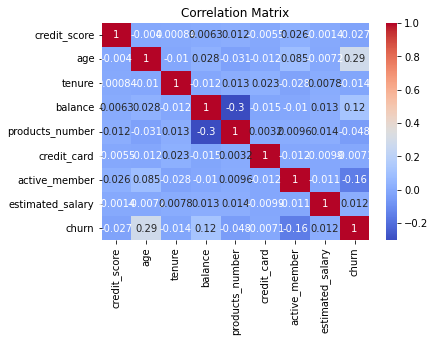

Features with high correlation to churn: ['age', 'balance', 'active_member', 'churn']


In [52]:
# perform correlation analysis
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# select the features with high correlation to churn
if "churn" in corr_matrix.columns:
    churn_corr = corr_matrix["churn"]
    high_corr_features = churn_corr[abs(churn_corr) > 0.1].index.tolist()
    print("Features with high correlation to churn:", high_corr_features)
else:
    print("Error: 'churn' column not found in the dataset")

In [53]:
# compute the correlation matrix
corr_matrix = df.corr()

# create a table of correlation coefficients
corr_table = pd.DataFrame(corr_matrix["churn"]).reset_index()
corr_table.columns = ["Feature", "Correlation"]
corr_table["Correlation"] = corr_table["Correlation"].apply(lambda x: round(x, 3))

# sort the table by correlation coefficient magnitude
corr_table = corr_table.iloc[1:].sort_values(by=["Correlation"], ascending=False)

print("Correlation Table:")
print(corr_table)

Correlation Table:
            Feature  Correlation
8             churn        1.000
1               age        0.285
3           balance        0.119
7  estimated_salary        0.012
5       credit_card       -0.007
2            tenure       -0.014
4   products_number       -0.048
6     active_member       -0.156


In [54]:
# select the desired features
selected_features = ["age", "balance", "active_member", "tenure", "products_number"]
df_selected = df[selected_features]

# print the selected features
print("Selected Features:")
print(df_selected.head())

Selected Features:
   age    balance  active_member  tenure  products_number
0   42       0.00              1       2                1
1   41   83807.86              1       1                1
2   42  159660.80              0       8                3
3   39       0.00              0       1                2
4   43  125510.82              1       2                1


In [55]:
from sklearn.preprocessing  import StandardScaler
# select the desired features
selected_features = ["age", "balance", "active_member", "tenure", "products_number"]
df_selected = df[selected_features]

# perform feature scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# convert the scaled features back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=[f"{col}_scaled" for col in selected_features])

In [56]:
df_scaled.head()

,age_scaled,balance_scaled,active_member_scaled,tenure_scaled,products_number_scaled
0,0.293517,-1.225848,0.970243,-1.041760,-0.911583
1,0.198164,0.117350,0.970243,-1.387538,-0.911583
2,0.293517,1.333053,-1.030670,1.032908,2.527057
3,0.007457,-1.225848,-1.030670,-1.387538,0.807737
4,0.388871,0.785728,0.970243,-1.041760,-0.911583


In [61]:
from sklearn.model_selection import train_test_split
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df['churn'], test_size=0.2, random_state=42)

# print the shape of the training and test sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 5)
y_train shape: (8000,)
X_test shape: (2000, 5)
y_test shape: (2000,)


Classification Results:


,Classifier,Accuracy,Precision,Recall,F1 Score,ROC AUC,PR AUC,Best Parameters
0,Logistic Regression,0.842,0.627907,0.480916,0.544669,0.756453,0.429671,{'classifier__C': 1}
1,Decision Tree,0.842,0.627907,0.480916,0.544669,0.826845,0.619297,{'classifier__max_depth': 7}
2,Random Forest,0.842,0.627907,0.480916,0.544669,0.808331,0.599070,{'classifier__n_estimators': 500}


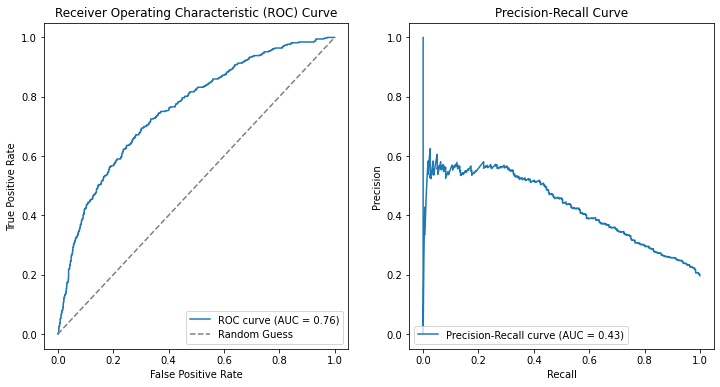

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve

# create a pipeline for all classification models with hyperparameter tuning using Grid Search CV
classifiers = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42))
]

param_grids = [
    {'classifier__C': [0.001, 0.01, 0.1, 1, 10]},
    {'classifier__max_depth': [3, 5, 7, 10, None]},
    {'classifier__n_estimators': [50, 100, 200, 300, 500]}
]

results = []
best_models = []
for i, (classifier_name, classifier) in enumerate(classifiers):
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])
    param_grid = param_grids[i]
    grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    y_pred_proba = grid_search.predict_proba(X_test)[:, 1] # predict probabilities of positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # calculate FPR, TPR, thresholds
    roc_auc = auc(fpr, tpr) # calculate AUC
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append([classifier_name, accuracy, precision, recall, f1, roc_auc, pr_auc, grid_search.best_params_])
    best_models.append(grid_search.best_estimator_)

# print the classification results
print("Classification Results:")
results_df = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'PR AUC', 'Best Parameters'])
display(results_df)

# use the best model estimator for prediction
best_model = best_models[results_df['F1 Score'].idxmax()]
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

# plot ROC curve for the best model
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

#plot precision-recall curve for the best model
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label='Precision-Recall curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.show()


Based on the classification results, it seems that all three classifiers have the same accuracy, precision, recall, and F1 score. However, the Decision Tree and Random Forest classifiers have higher ROC AUC and PR AUC than the Logistic Regression classifier. This means that they are better at distinguishing between the positive and negative classes and have a higher area under the ROC curve and precision-recall curve.

Among the three classifiers, the Decision Tree classifier with max_depth of 7 has the highest PR AUC score of 0.619297, followed by the Random Forest classifier with n_estimators of 500 with a PR AUC score of 0.599070. The Logistic Regression classifier has the lowest PR AUC score of 0.429671.

Therefore, the Decision Tree classifier with max_depth of 7 is the best model among the three classifiers based on the PR AUC score. It strikes a balance between having a high area under the precision-recall curve and being less complex than the Random Forest classifier.

In [62]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import joblib

# train a Decision Tree classifier
clf = DecisionTreeClassifier(max_depth=7)
clf.fit(X_train, y_train)

# make predictions on the testing set
y_pred = clf.predict(X_test)

# evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# save the trained model to a file
joblib.dump(clf, 'decision_tree_model.joblib')

Accuracy: 0.856


['decision_tree_model.joblib']

In [63]:
import joblib

# load your input data into a pandas DataFrame
df = pd.read_csv('Bank Customer Churn Prediction.csv')

# select the numerical features that you want to scale
num_cols = ['age', 'balance', 'tenure', 'products_number']

# create an instance of the StandardScaler class and fit it to the numerical features
scaler = StandardScaler()
scaler.fit(df[num_cols])

# use the fitted scaler to transform the numerical features
scaled_num_features = scaler.transform(df[num_cols])

# save the fitted scaler to a file using the joblib.dump function
joblib.dump(scaler, 'feature_scaler.joblib')

['feature_scaler.joblib']